In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting!
import seaborn as sns #cute messing with style

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/students-performance/DATA (1).csv


In [2]:
%matplotlib inline
sns.set_style('darkgrid')
df = pd.read_csv('/kaggle/input/students-performance/DATA (1).csv')
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


In [3]:
df.shape

(145, 33)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   3           145 non-null    int64 
 4   4           145 non-null    int64 
 5   5           145 non-null    int64 
 6   6           145 non-null    int64 
 7   7           145 non-null    int64 
 8   8           145 non-null    int64 
 9   9           145 non-null    int64 
 10  10          145 non-null    int64 
 11  11          145 non-null    int64 
 12  12          145 non-null    int64 
 13  13          145 non-null    int64 
 14  14          145 non-null    int64 
 15  15          145 non-null    int64 
 16  16          145 non-null    int64 
 17  17          145 non-null    int64 
 18  18          145 non-null    int64 
 19  19          145 non-null    int64 
 20  20        

### Names
Due to all the names of these data-points being hidden behind ascending integers, were gonna grab and rename a handful of values I think are interesting. 

In [5]:
# Rename columns
df.rename(columns={'1': 'AGE', '7': 'SINGLE','20':'ATTENDENCE','25':'NOTETAKING','30': 'GPA'}, inplace=True)

# Access the renamed columns using loc
preview_columns = ['AGE', 'SINGLE', 'NOTETAKING','GPA','GRADE']
df.loc[:, preview_columns].head()

,AGE,SINGLE,NOTETAKING,GPA,GRADE
0,2,2,3,1,1
1,2,2,3,3,1
2,2,2,2,2,1
3,1,1,3,2,1
4,2,1,2,2,1


In [6]:
df_clean = df.copy()

# List of columns to keep
selected_columns = [
    'AGE',
    'SINGLE',
    'NOTETAKING',
    'GPA',
    'GRADE',
    'ATTENDENCE',
]

# Get the list of columns that exist in the DataFrame but are not in the selected_columns list
columns_to_remove = [col for col in df_clean.columns if col not in selected_columns]

# Drop the columns that are not in the selected_columns list
df_clean.drop(columns=columns_to_remove, inplace=True)

# Display DataFrame info to verify
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   AGE         145 non-null    int64
 1   SINGLE      145 non-null    int64
 2   ATTENDENCE  145 non-null    int64
 3   NOTETAKING  145 non-null    int64
 4   GPA         145 non-null    int64
 5   GRADE       145 non-null    int64
dtypes: int64(6)
memory usage: 6.9 KB


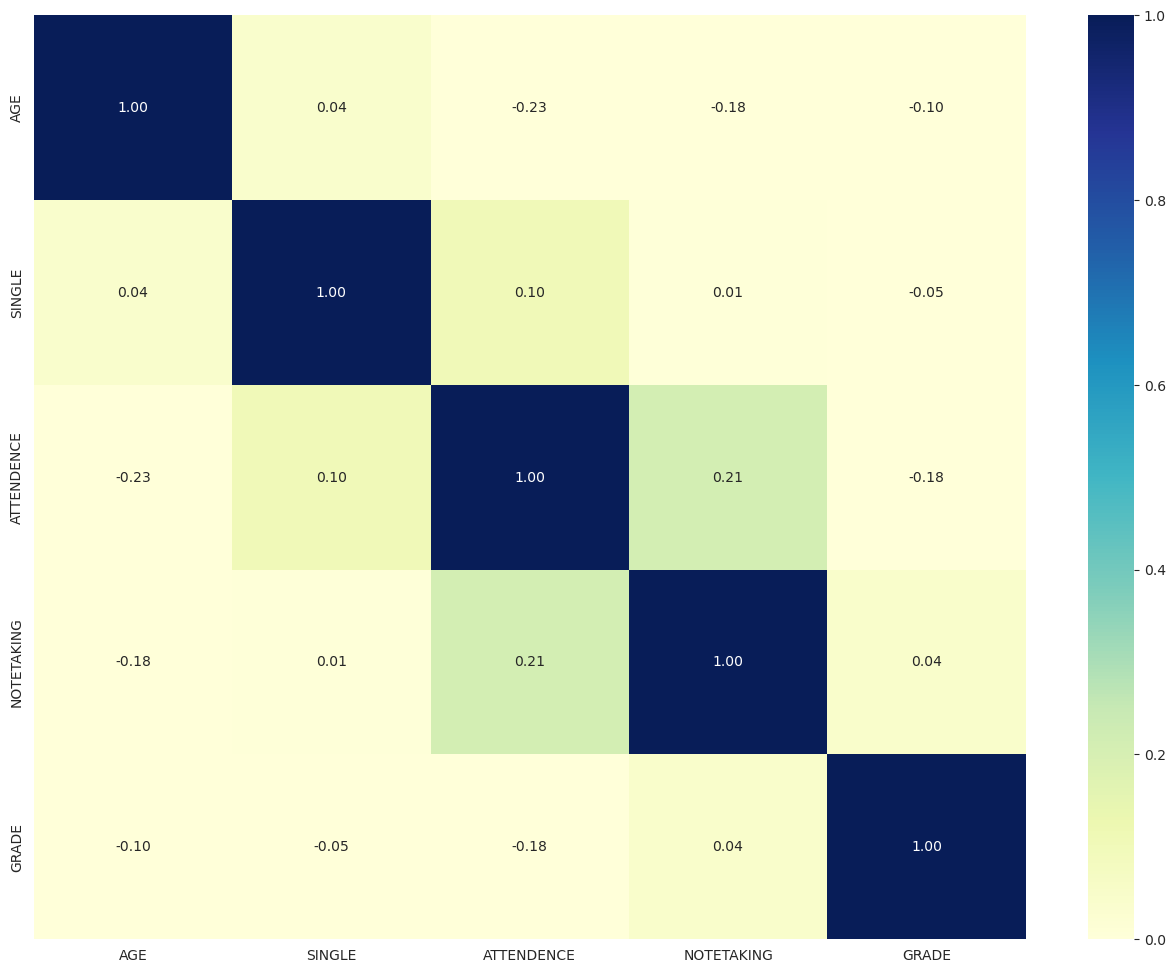

In [7]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_clean.drop('GPA', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

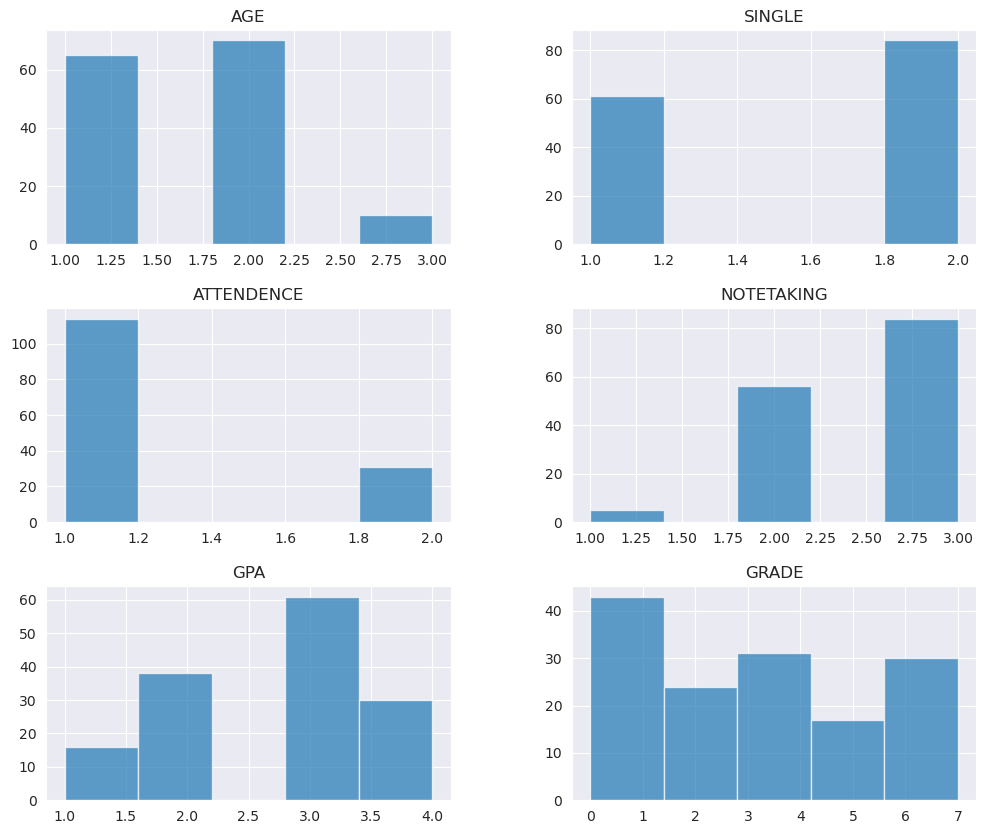

In [8]:
df_clean.hist(alpha = 0.7, figsize=(12,10), bins=5);

## Well, that's odd. 
Nothing seems to be signifigently correlated; the only items with anything close to any correlation are ATTENDANCE and NOTETAKING. I wanted to be lazy and not expand our data-set, but guess we gotta do it the hard way.

Round two.

In [9]:
%matplotlib inline
sns.set_style('darkgrid')
df = pd.read_csv('/kaggle/input/students-performance/DATA (1).csv')
df.head()

,STUDENT ID,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


/tmp/ipykernel_20/2001646800.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.drop('30', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);


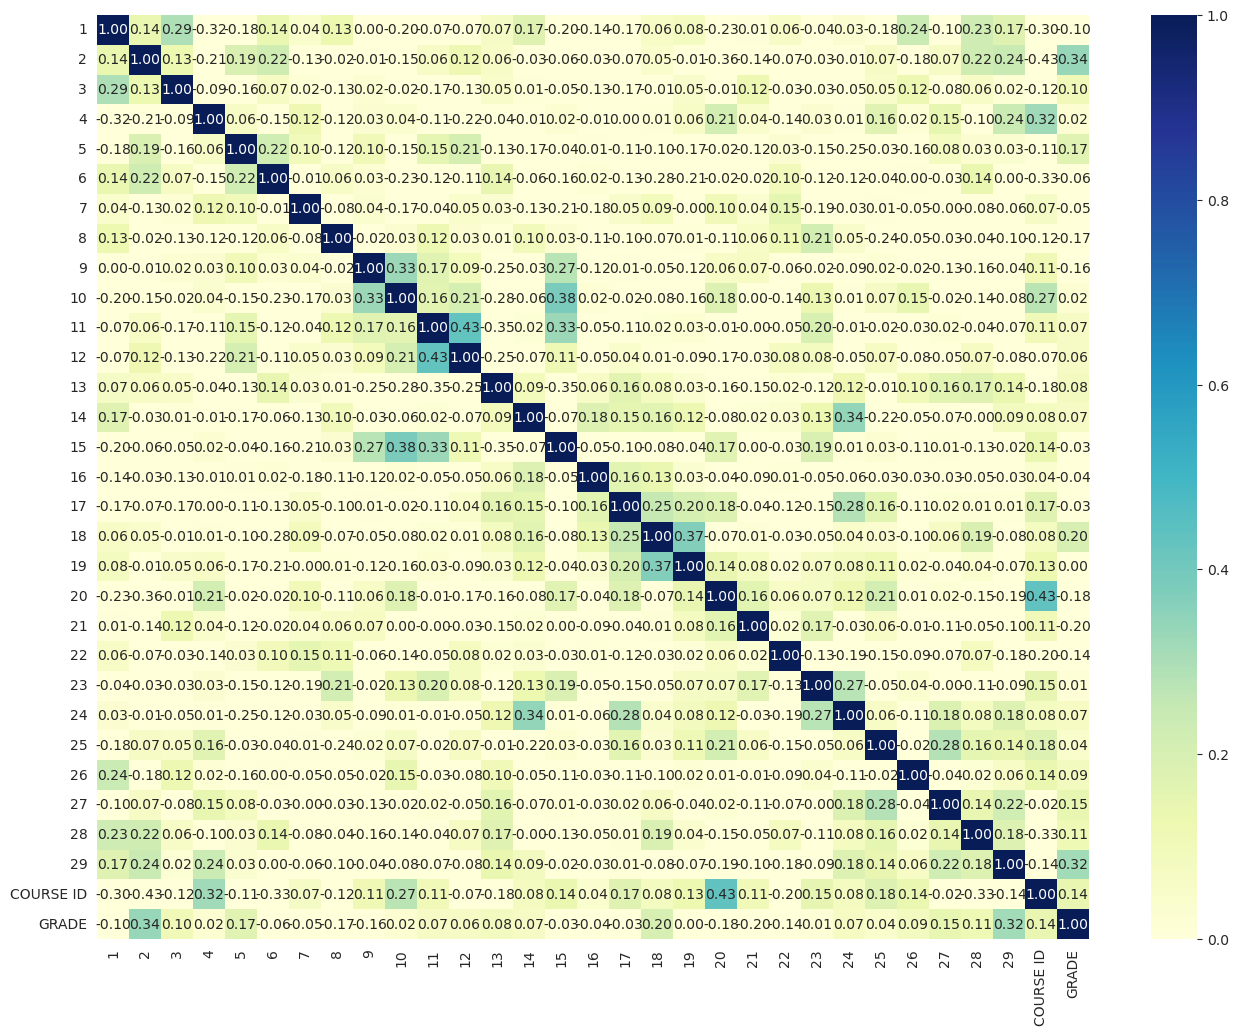

In [10]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.drop('30', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

### So we messed up, as per usual.
And it is at this point that we realized we were aproaching this problem wrong. There's a couple of things with this data-set that throw wrenches into our planning. 
* Reverse Coding: Some items are reverse coded, for example; grades are set to move from lowest-to-highest, but attendance to class goes 1:always, 2:sometimes, and 3:never. Meaning a number of correlations will be flipped or wierd until we unflip those values. 
* Non-normalized Values: Other items are entierly impossible to normalive, like as accomindation type, which ranges from rental, to dormitory, to the ever present other. 

## What to do? 
* Firstly, we cut some of the data that is wacky. Not that we can't use it in isolation, but it's hard to quanity how useful your spouses occupation by it being goverment or private sector. 
* Secondly, in trying to identify some patterns, we can flip the data that is currently reverse coded. I'm not doing that bit, because im lazy and not that attached to the data. Reargless, here are the items that should be reverse coded, by my reckoning.
reversed_collums = ['5','6','7','20','22',]


In [11]:
df_cut = df.copy()
#Cutting our data to make it more managable
columns_to_remove = [
    '3',
    '9',
    '10',
    '14',
    '15',
    '16',
    '21',
    '23',
    '24',
    '28',
    '5',
    '6',
    '7',
    '20',
    '22',
    'COURSE ID',
]
# Drop the columns to remove
df_cut.drop(columns=columns_to_remove, inplace=True)

# Display DataFrame info to verify
df_cut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   STUDENT ID  145 non-null    object
 1   1           145 non-null    int64 
 2   2           145 non-null    int64 
 3   4           145 non-null    int64 
 4   8           145 non-null    int64 
 5   11          145 non-null    int64 
 6   12          145 non-null    int64 
 7   13          145 non-null    int64 
 8   17          145 non-null    int64 
 9   18          145 non-null    int64 
 10  19          145 non-null    int64 
 11  25          145 non-null    int64 
 12  26          145 non-null    int64 
 13  27          145 non-null    int64 
 14  29          145 non-null    int64 
 15  30          145 non-null    int64 
 16  GRADE       145 non-null    int64 
dtypes: int64(16), object(1)
memory usage: 19.4+ KB


/tmp/ipykernel_20/2307684895.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cut.drop('30', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);


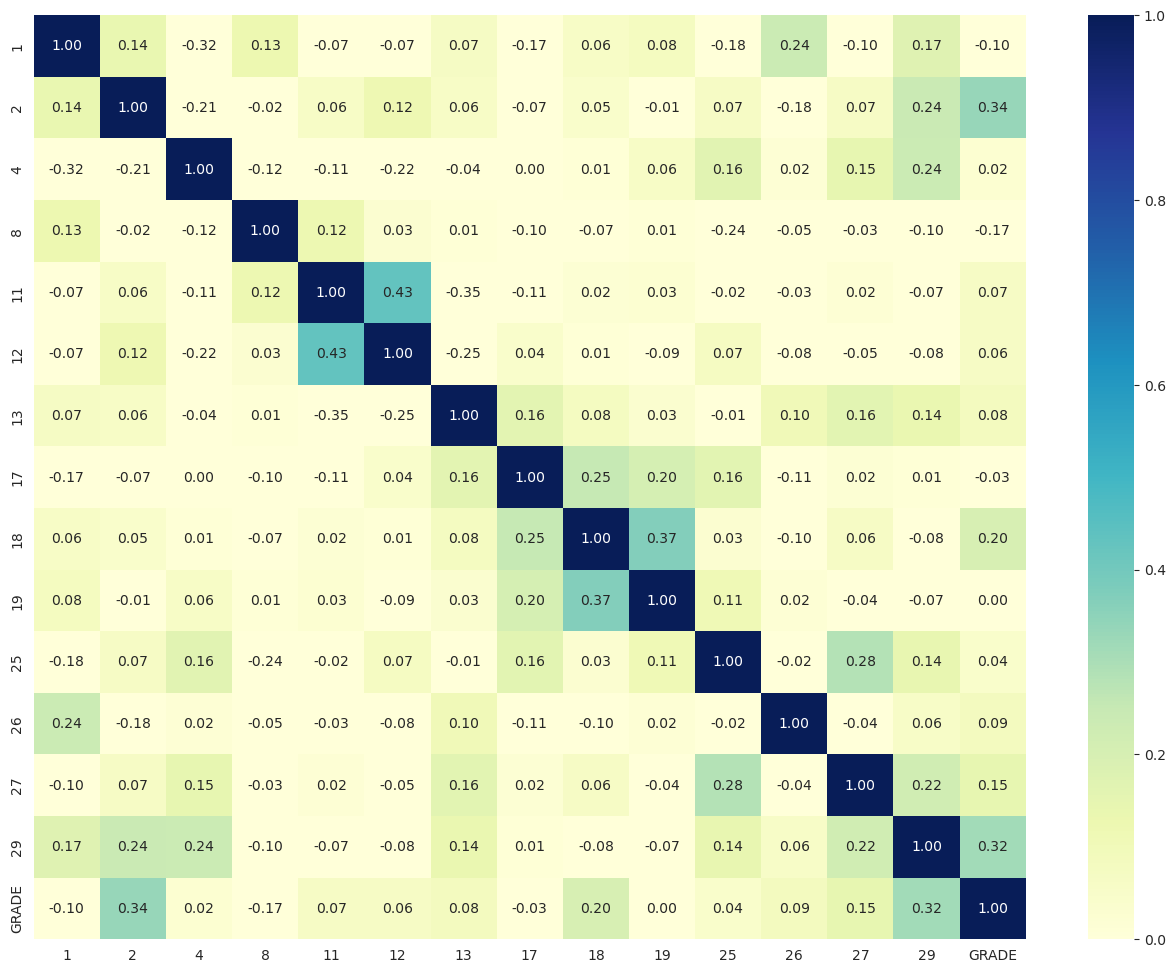

In [12]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_cut.drop('30', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

## Renaming Everything

In [13]:
# Rename columns
df_cut.rename(columns={
    '1': 'AGE',
    '2': 'SEX',
    '4': 'SCHOLSHIP',
    '7': 'SINGLE',
    '8': 'SALARY',
    '11': 'MOTHERS_EDU',
    '12': 'FATHERS_EDU',
    '13': 'SIBLNIGS',
    '17': 'STUDY_HOURS',
    '18': 'READS_NON_FIC',
    '19': 'READS_FIC',
    '25': 'NOTETAKING',
    '26': 'LISTENS',
    '27': 'DISCUSSION',
    '29': 'PAST_GPA',
    '30': 'GPA',}, inplace=True)

### Expected GPA

/tmp/ipykernel_20/1693217616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cut.drop('PAST_GPA', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);


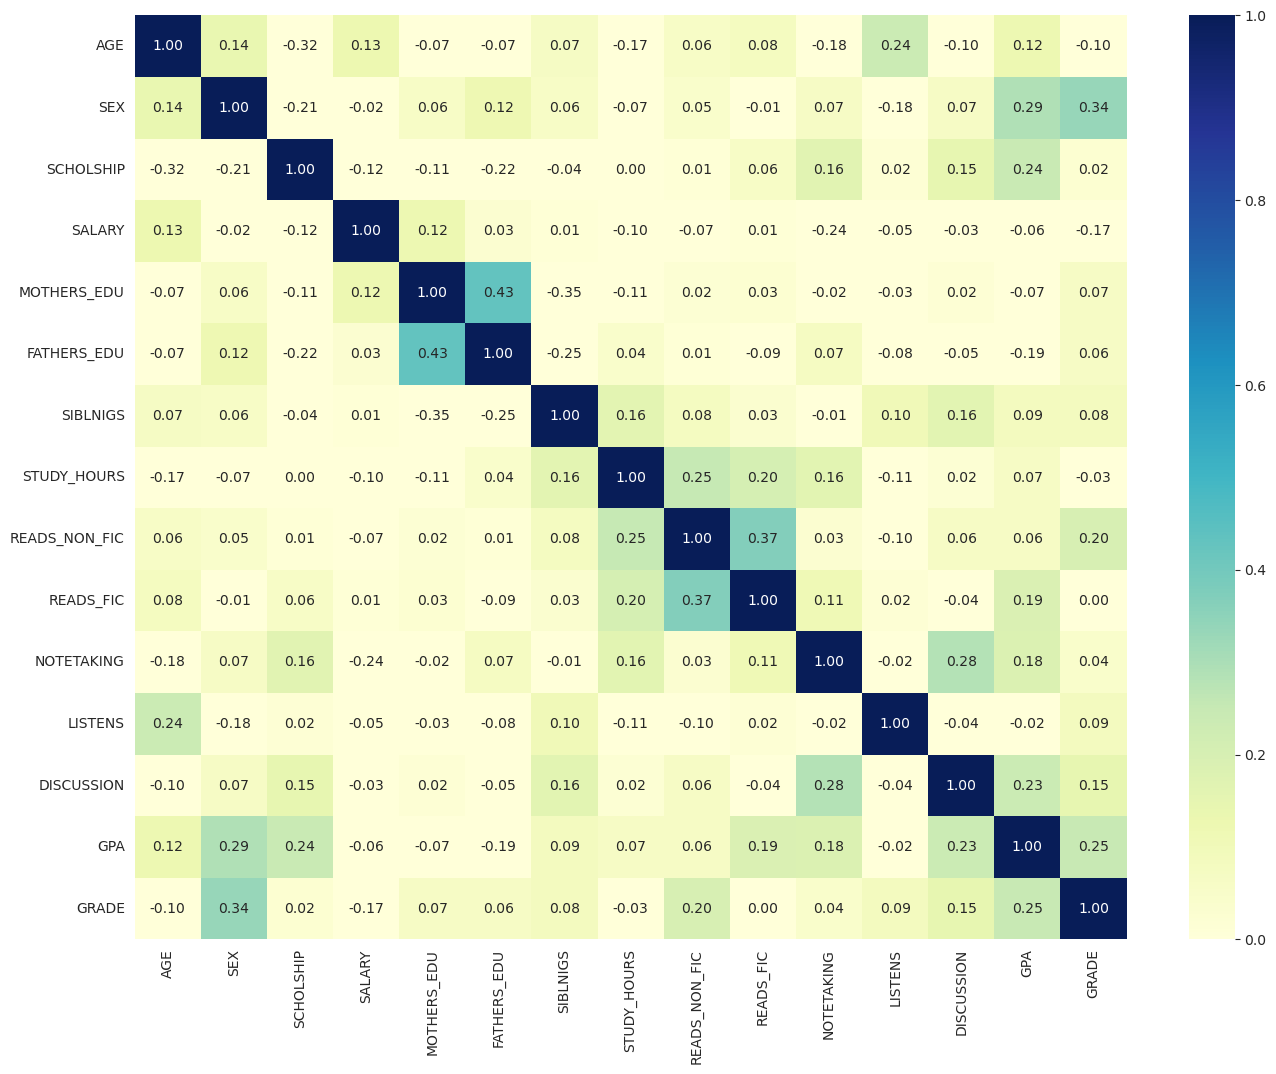

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_cut.drop('PAST_GPA', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

### Past GPA

/tmp/ipykernel_20/1693217616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_cut.drop('PAST_GPA', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);


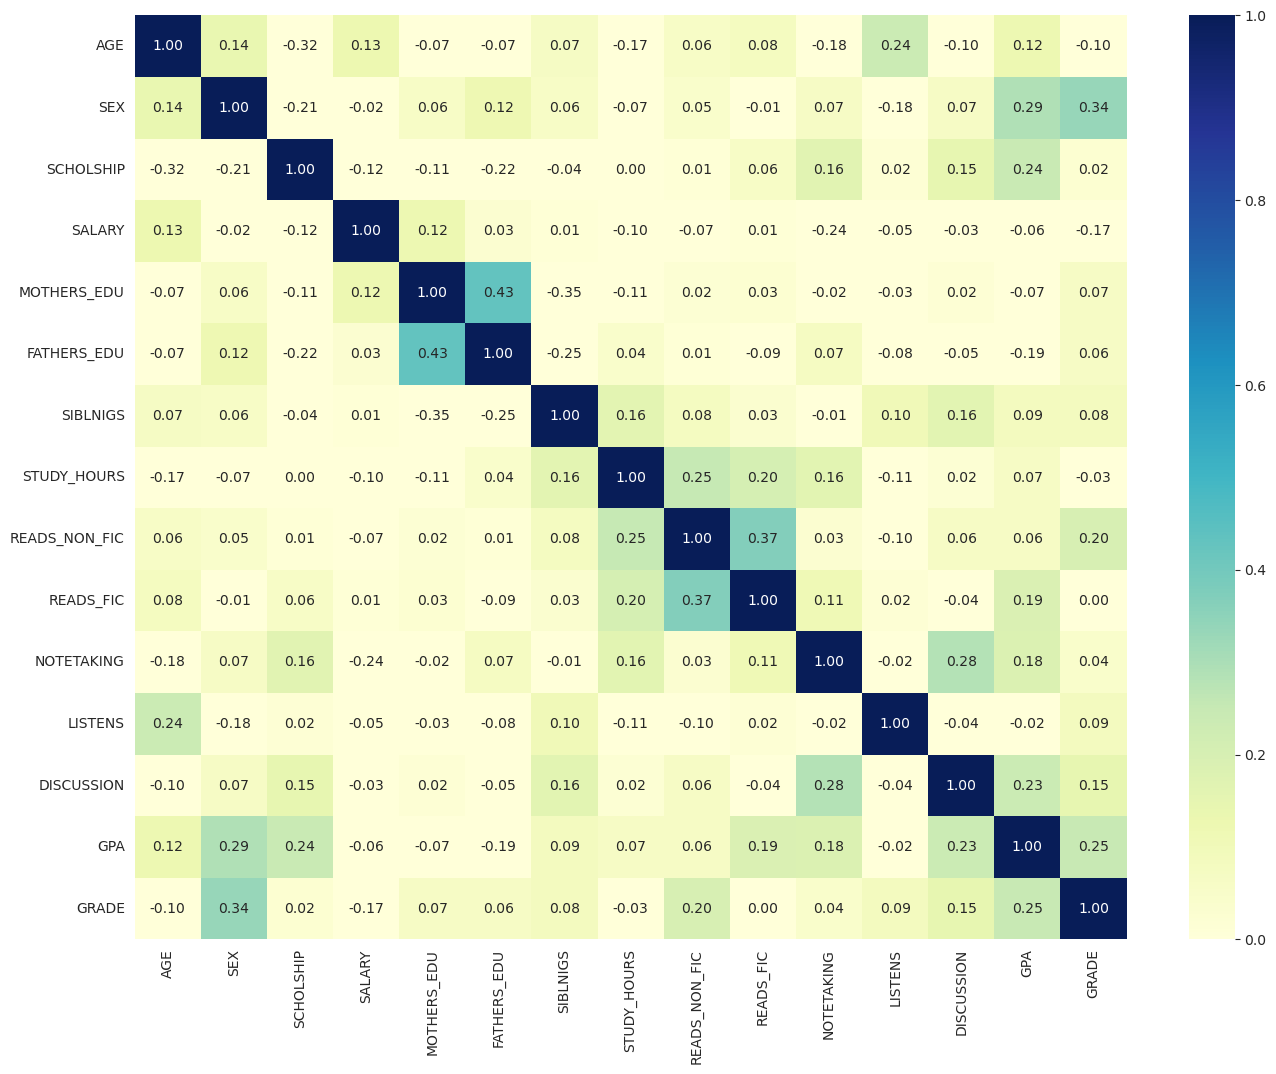

In [15]:
plt.figure(figsize=(16, 12))
sns.heatmap(df_cut.drop('PAST_GPA', axis=1).corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

### Histogram

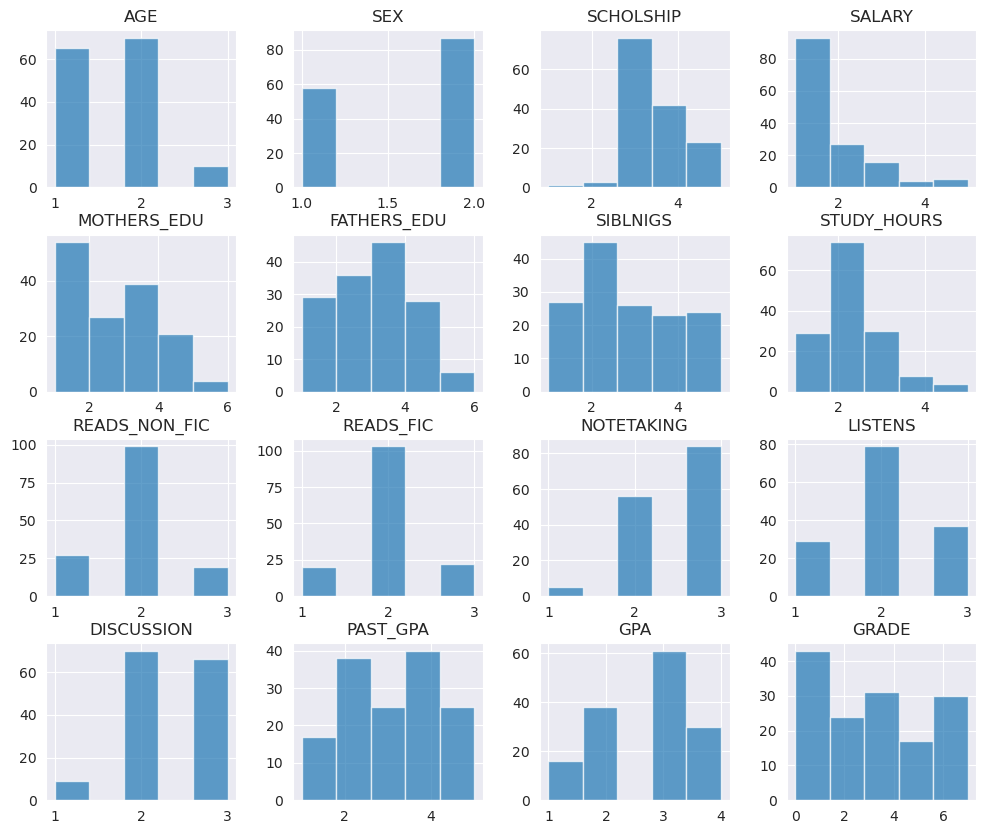

In [16]:
df_cut.hist(alpha = 0.7, figsize=(12,10), bins=5);

# Conculsions

### Limitations of the Data
* **Self Survey**: While I make a claim to what this data communicatins in the conclusion, I remain rather unconvinced. There have been a great deal of studies on note taking, for instance, that imply it to signifigency increase a students academic potential to do so. While our data does imply a positive correlation with note taking, it is not of signfigence. I believe this due to the self-declaritve nature of a survey like this, were students may have different understanding of how often 'sometimes' is.
* **Lack of Diversity**: To return to the above, some questions are coded in such a way that a gray, or middle answer, is hard to place. Note taking is to note, quite a hot button issues to students, and yet only has three options present 'Always', 'sometimes', and 'never' which does not capture the bredth of a topic as potentially deep as this.
* **Lack of Demographic Information**: This dataset lacks race, ethnicy, gender, orientation, and disabillities, all factors later datasets of this type I believe should include.
* **Integer Labeling**: The labeling of almost every variableis done with a simple esclating integer, which I belive should be replaced with respective names. This would also fix the inconsistent labeling; while most variables names are integers, some are not, as is the case with ID and GPA. 
* **Reverse Coded**: This ones partially my fault, but there are items here that seem flipped. At times, they mark the presense of something, and at times they mark it's absense.

### Limitations of the Anlysis
* **Me**: Hi! My names Mat! I'm also just a self-taught student in all this, and any mistakes or assumptions made with the data are mine alone. If you have any (nice) critique, I'de love to hear it!
* **No Predictive Model**: Considering all the low correlatins I found here, I did not see it fit to continue with a predictive model. Should someone else find a stronger correlation to student performance, such a model could be warrented. 
* **Removal of Many Variables**: Many interesting variabels were cut, of note to me are attendence to class and the type of high-school the student graudated from.


### Low Correlation Accros the Board
I find that rather suprising; almost every correlation present is under .3 signifigence, implying only a very slight correlation. There are two outliers here; sex and grades, and reading. However the data seems to imply that there are not strong determing factors to a student's performance that can be determined off of this demographic information. To put this another way, a students accedemic outcomes cannot be easily predicted with discrite data like this, implying that each student has the freedom to determine what methods are best for thier learning.